In [1]:
#Importing all required packages for this machine learning process to be able to work through it comprehensively

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataset, using only three of the columns of the original 15 that I narrowed down to be to most
# 'correlated' to whether a customer churned or not, based on a heat map examination of all 15 variables.
dataset = pd.read_csv('Churn.csv', usecols=['Total day charge',
                   'Total eve charge', 'Customer service calls', 'Churn'])

In [24]:
# Using summarizing processes to get a good understanding of what the data 'looks like'.  These methods will
# show how many rows and columns are in the dataset, give common descriptive statistics, and show me the first
# 5 rows of data.
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())

(667, 4)
   Total day charge  Total eve charge  Customer service calls  Churn
0             31.37             29.89                       1  False
1             21.95             19.42                       4   True
2             56.59             27.01                       4   True
3             18.77             11.67                       2  False
4             20.28             18.28                       1  False
       Total day charge  Total eve charge  Customer service calls
count        667.000000        667.000000              667.000000
mean          30.761769         17.285262                1.563718
std            9.436463          4.226160                1.333357
min            4.400000          4.090000                0.000000
25%           24.860000         14.540000                1.000000
50%           30.310000         17.310000                1.000000
75%           37.520000         20.095000                2.000000
max           56.830000         30.750000        

In [4]:
# We can see how many records were churned vs not churned by using the following:
dataset.groupby('Churn').size()

# This will give us the average values of the three feature columns I am using to build the model.
print("The Average Total Day Charge is : ",round(dataset['Total day charge'].mean(),2))
print("The Average Total Eve Charge is : ",round(dataset['Total eve charge'].mean(),2))
print("The Average Customer Service Calls is : ",round(dataset['Customer service calls'].mean(),2))

# This tells us if we have categorical or numerical columns.  Important to understand as only certain formats can be used
# with certain processes/methods.
categorical = dataset.select_dtypes(include=[object])
print("Categorical Columns:",categorical.shape[1])
numerical = dataset.select_dtypes(exclude=[object])
print("Numerical Columns:",numerical.shape[1])

# This checks for any missing values in the dataset.
dataset.isnull().any().any()

The Average Total Day Charge is :  30.76
The Average Total Eve Charge is :  17.29
The Average Customer Service Calls is :  1.56
Categorical Columns: 0
Numerical Columns: 4


False

In [5]:
# This will set the feature columns as a list of lists and assign to a separate dataset (x)
# and will also take the values of the 'Churn' column and assign to another separate dataset (y)
feature_columns = ['Total day charge', 
                   'Total eve charge', 'Customer service calls']
X = dataset[feature_columns].values
y = dataset['Churn'].values

In [6]:
# Label encoder transforms the values of the y dataset from strings (words) to numbers to
# use to build the model as strings cannot be used.
le = LabelEncoder()
y = le.fit_transform(y)
# Labels after encoding
print(y)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [7]:
# This splits the data into a training and testing set.  Here, 80 percent of the records are used to 
# train the model, then it tests its results against the remaining 20 percent to determine accuracy of
# predictions vs actual observed data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# This shows how many rows were included in the training set (533 out of 667 rows)
X_train.shape

(533, 3)

In [8]:
# This is the feature scaling process.  It allows us to compare 'apples to apples' by standardizing the data across
# the columns so none have a disproportionate impact to the model.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# This gives us a look at the newly scaled data.
print(X_train)

[[-0.10385223 -0.25407202  0.29660469]
 [-0.27400183  0.27925642  1.79509096]
 [ 1.77094431 -0.46740339  2.54433409]
 ...
 [ 0.22489361 -0.09999936 -1.20188157]
 [ 0.19023351  1.0780639  -0.45263844]
 [ 0.4276027  -0.96280625  1.04584782]]


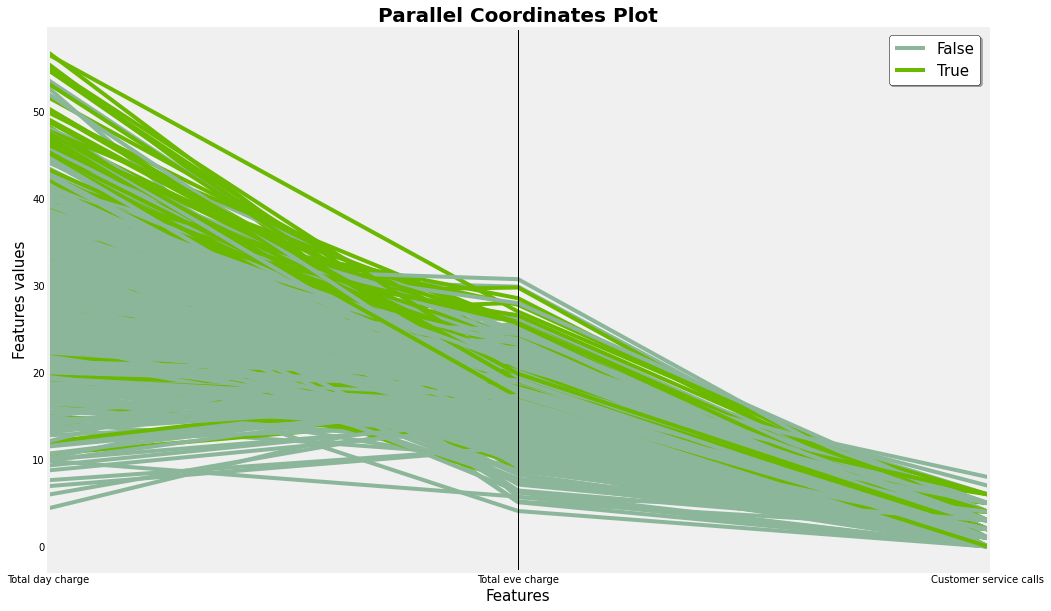

In [9]:
# Beginning to create visuals.  Here, a parallel coordinates graph is used.  It plots a record over each
# feature column and is connected by a line graph.  Allows us to see trends in the data as the colors are
# differentiated on whether the customer churned or not.

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "Churn")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

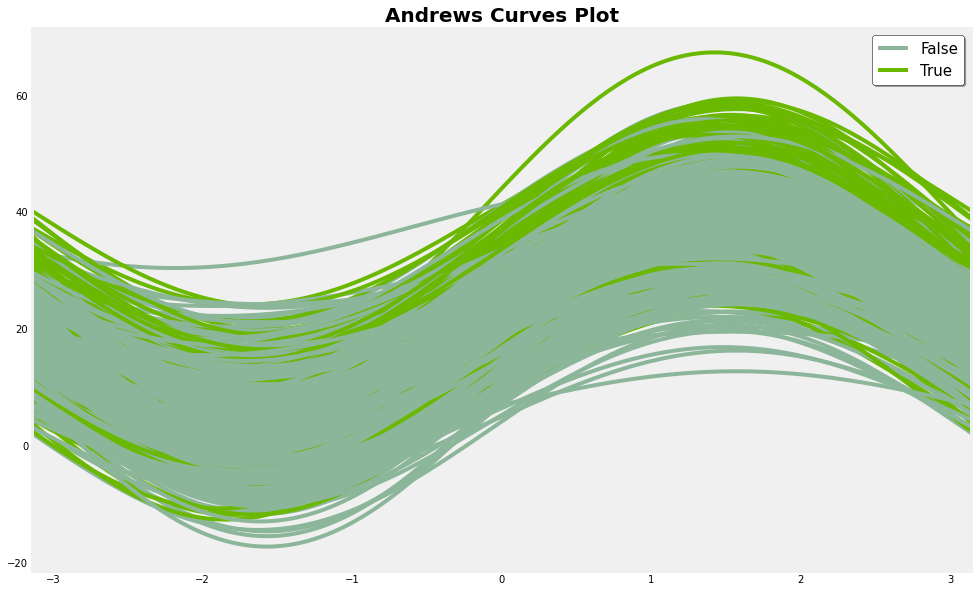

In [10]:
# Here is another plot, similar to the parallel coordinates plot, as it smooths it out using coefficients.
# It should show a similar comparison.

from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "Churn")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 432x288 with 0 Axes>

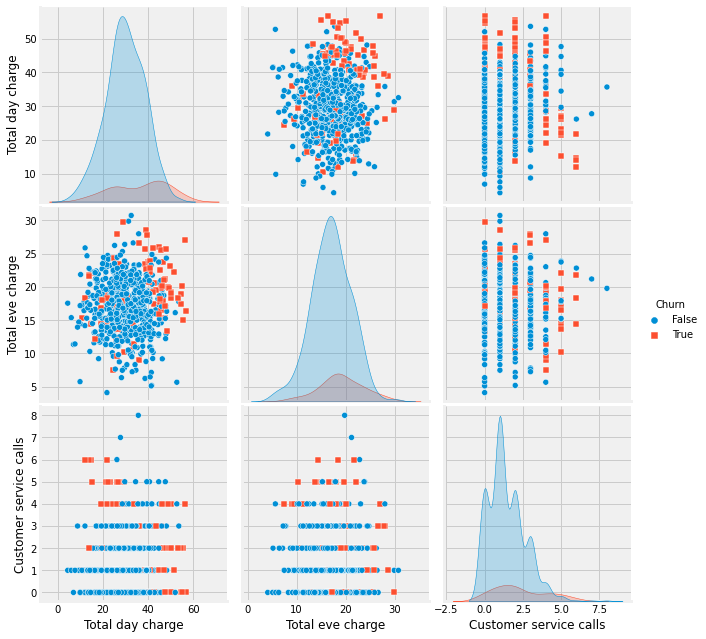

In [11]:
# This visualization compares the three variables against each other, two at a time (here, 3 variables so 3 squared
# equals 9 seaparate plots).  It allows us to see relationships amongst the two variables by plotting the points
# and then differentiating them based on color and shape (churned vs not churned)

plt.figure()
sns.pairplot(dataset, hue = "Churn", height=3, markers=["o", "s"])
plt.show()

<Figure size 432x288 with 0 Axes>

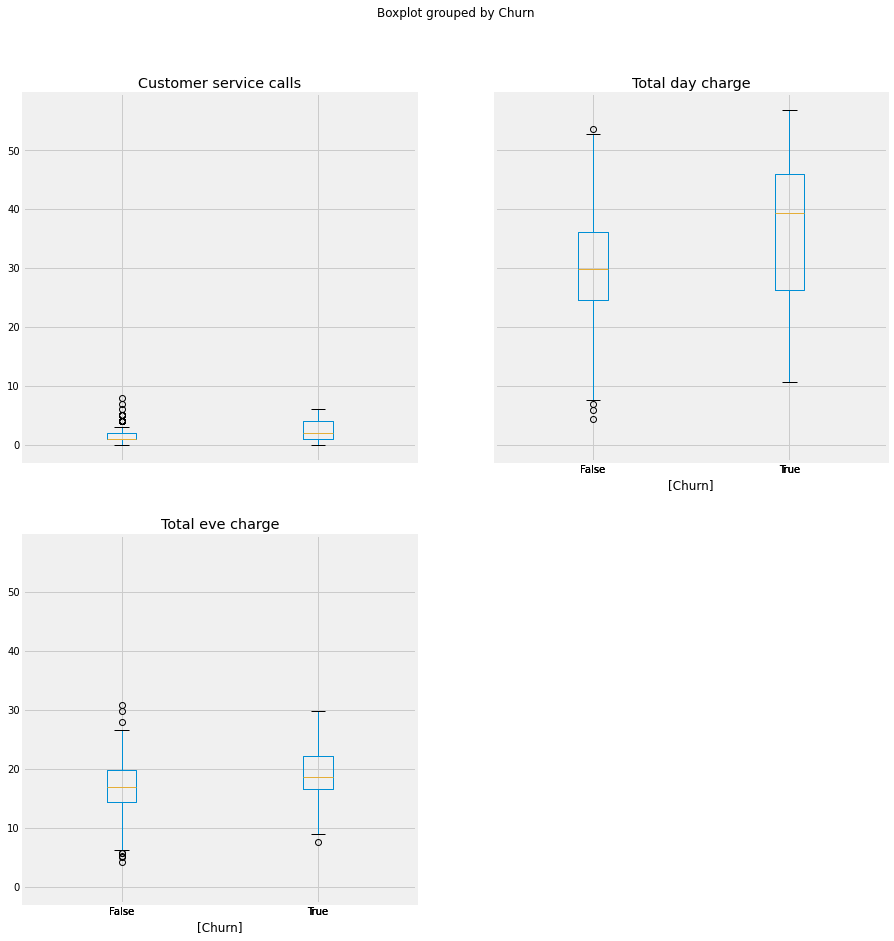

In [12]:
# A boxplot allows us to see any outlying datapoints (outliers) that we may want to examine further.  Here, there
# are three visuals, one for each column.  Each is divided into two, based on whether the customer churned or not.

plt.figure()
dataset.boxplot(by="Churn", figsize=(15, 15))
plt.show()

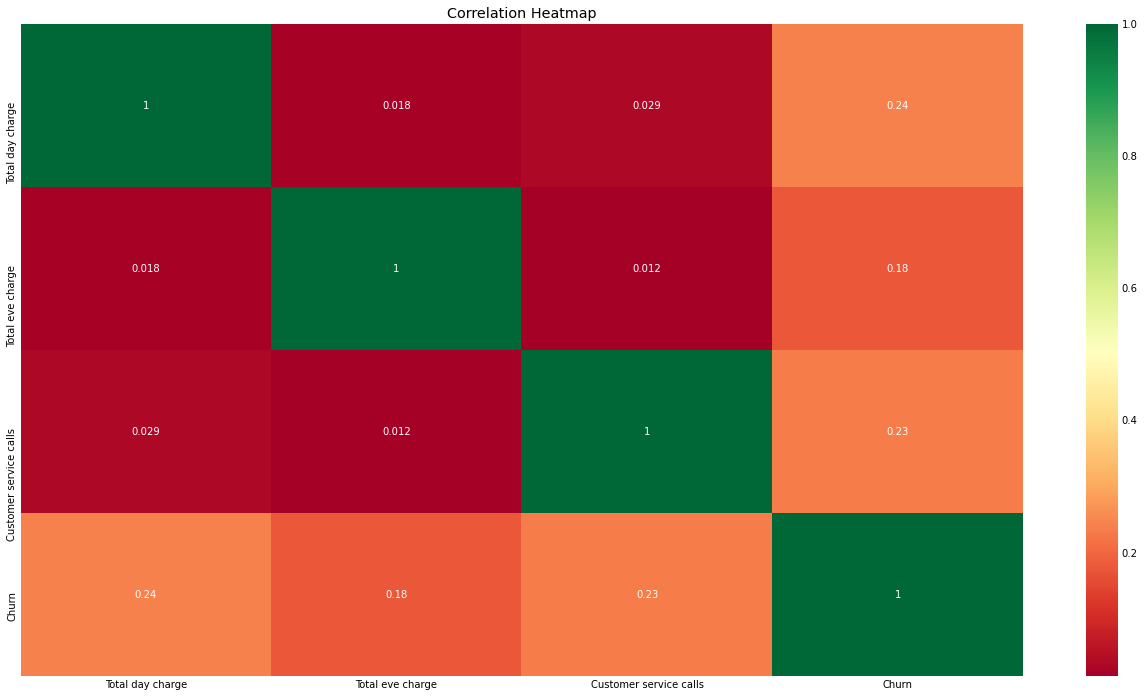

In [13]:
# This is a heat map that cross references the correlation of each to the overall model formula.  Higher values show
# higher correlation and are good targets to use for building a machine learning formula/model.

plt.figure(figsize=(20,12))
#draws heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(dataset.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Here I am starting to use k nearest neighbor (KNN) to make predictions.  I begin by examining the use of 3 neighbors,
# which is a common starting point.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)

# This fits the model
classifier.fit(X_train, y_train)

# This predicts the results.
y_pred = classifier.predict(X_test)

In [15]:
# This provides an easy to read crosstab of the comparisons of the predicted results vs the actual results.

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,108,7,115
1,9,10,19
All,117,17,134


In [16]:
# This report gives the precision, weighted average (F1 score), and accuracy of the comparisons.

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       115
           1       0.59      0.53      0.56        19

    accuracy                           0.88       134
   macro avg       0.76      0.73      0.74       134
weighted avg       0.88      0.88      0.88       134



In [17]:
# This is an easy to read format printing of how accurate our model is (in percentage - near 90%).

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 88.06 %.


In [18]:
# This process below is one form of cross validation.  I am looking to re-run the model against other data to determine
# accuracy if the model.  Here I am doing a 10-fold cross validation, splitting the data into 10 partitions to ensure
# consistent accuracy across the set.

# creating list of K for KNN
k_list = list(range(1,50,2))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

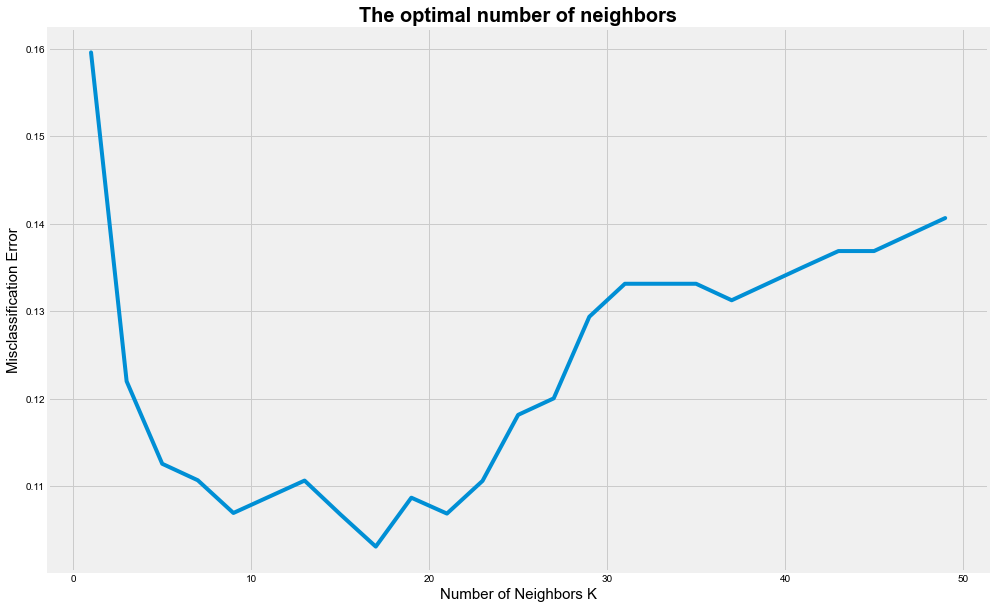

In [19]:
# Here, I am building a plot and looking for the comparison of the cross-validated results (k) along a linear graph.

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [20]:
# I locate the best k (number of neighbors) based on the lowest MSE among the created visual from above step.
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 17.


In [21]:
#I import GridSearchCV library/package to use
from sklearn.model_selection import GridSearchCV

# This is another cross validation process to determine consistency and reduce variance in outputs by locating the optimal
# number of neighbors to use in the model.  We do this by dividing the data up (here into 5 sets), then run the model against
# the sets to again test for accuracy and find the optimal number of neighbors.
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
# The below gives the highest accuracy percentage and optimal number of neighbors to use via this method.

print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.8815508921557627
{'n_neighbors': 3}
